Imported Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

loading and preparing the data

In [37]:
cleaned_excel = pd.read_excel('cleaned_employee_sample_data.xlsx')
dataframe_clean = pd.DataFrame(cleaned_excel)

Grouping by Gender and calculating the average salary

In [38]:
grp_by_gender = dataframe_clean.groupby("Gender")
avg_salary= grp_by_gender["Annual Salary"].mean()
print(avg_salary)

Gender
Female    112684.759843
Male      113990.235169
Name: Annual Salary, dtype: float64


Grouping by ethnicity and calculating the average salary

In [39]:
grp_by_ethnicity = dataframe_clean.groupby("Ethnicity")
avg_salary2= grp_by_ethnicity["Annual Salary"].mean()
print(avg_salary2)

Ethnicity
Asian        117916.880299
Black        109706.287671
Caucasian    108676.683398
Latino       111768.259109
Name: Annual Salary, dtype: float64


Grouping by Job and calculating the average salary

In [40]:
grp_by_job = dataframe_clean.groupby("Job Title")
avg_salary3= grp_by_job["Annual Salary"].mean()
sorted= avg_salary3.sort_values(ascending=True)
print(sorted)

Job Title
IT Coordinator                     48024.454545
Systems Analyst                    48787.933333
Business Partner                   49031.611111
Analyst                            49950.666667
HRIS Analyst                       61760.375000
Account Representative             62281.619048
Analyst II                         62418.538462
Network Engineer                   74171.714286
Test Engineer                      74550.833333
Network Administrator              75908.400000
Development Engineer               77889.210526
Solutions Architect                78163.266667
Field Engineer                     78826.263158
Technical Architect                79357.750000
System Administrator               80218.000000
Computer Systems Manager           80346.809524
Network Architect                  81011.235294
IT Systems Architect               81496.833333
Service Desk Analyst               82329.200000
Quality Engineer                   83564.400000
Enterprise Architect          

Filtering data for salaries > 100000 and creating a pie chart

Gender
Female    235
Male      217
dtype: int64


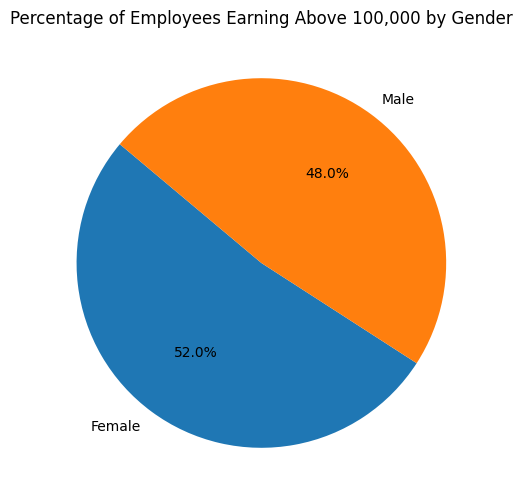

In [41]:
newdf= dataframe_clean[['Gender', 'Annual Salary']].copy()
filtered_newdf= newdf[newdf['Annual Salary'] > 100000]
group_by_gender = filtered_newdf.groupby("Gender").size()
print(group_by_gender)
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(6, 6))
plt.pie(group_by_gender, labels=group_by_gender.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees Earning Above 100,000 by Gender')
plt.show()

Analyzing Directors by gender with a diverging bar chart

Gender
Female    66
Male      53
dtype: int64


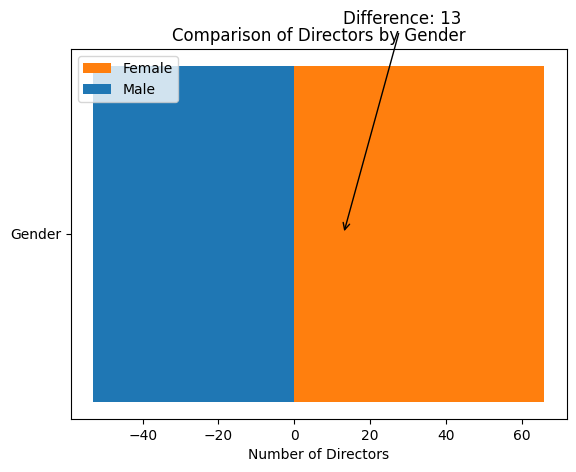

In [42]:
newdff2= dataframe_clean[['Gender', 'Job Title','Annual Salary']].copy()
filtered_newdff2= newdff2[newdff2['Job Title'] == "Director"]
group_by_gender2 = filtered_newdff2.groupby("Gender").size()
print(group_by_gender2)

diff = group_by_gender2['Female'] - group_by_gender2['Male']

plt.barh('Gender', group_by_gender2['Female'], color='#ff7f0e', label='Female')
plt.barh('Gender', -group_by_gender2['Male'], color='#1f77b4', label='Male')

plt.xlabel('Number of Directors')
plt.title('Comparison of Directors by Gender')
plt.legend()

plt.annotate(f'Difference: {abs(diff)}', xy=(diff, 0), xytext=(diff, 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.show()

Counting Bonuses based on ethnicity


Ethnicity
Asian        401
Caucasian    259
Latino       247
Black         73
Name: count, dtype: int64


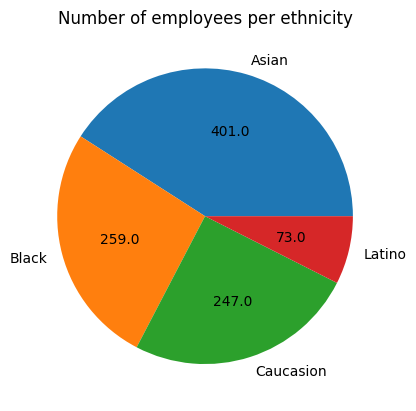

In [43]:
ethnicity_counts = cleaned_excel['Ethnicity'].value_counts()

print(ethnicity_counts)

sizes = numpy.array([ethnicity_counts])
def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

colors2 = ['yellow', 'black', 'white', 'red']
labels  = ['Asian', 'Black', 'Caucasion', 'Latino']
plt.title("Number of employees per ethnicity")
plt.pie(ethnicity_counts, labels = labels, autopct=absolute_value)
plt.show()

Ethnicity
Asian        206
Black         34
Caucasian    116
Latino       113
Name: Bonus %, dtype: int64


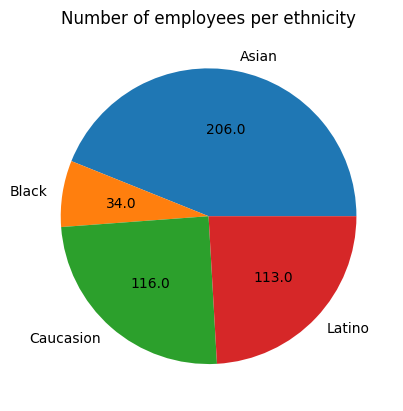

In [44]:
newdff3= dataframe_clean[['Gender', 'Job Title','Annual Salary', 'Ethnicity', "Bonus %"]].copy()

for x in newdff3.index:
  if newdff3.loc[x, "Bonus %"] == 0:
    newdff3.drop(x, inplace = True)
    
bonuses = newdff3.groupby("Ethnicity")
count_bonuses = bonuses["Bonus %"].count()
print(count_bonuses)


sizes = numpy.array([count_bonuses])
def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

colors2 = ['yellow', 'black', 'white', 'red']
labels  = ['Asian', 'Black', 'Caucasion', 'Latino']
plt.title("Number of employees per ethnicity")
plt.pie(count_bonuses, labels = labels, autopct=absolute_value)
plt.show()